In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Paths
labels_dir = "C:/Users/izaka/anaconda_projects/Portfolio/3_Annotation_Coffee/data/labels"
images_dir = "C:/Users/izaka/anaconda_projects/Portfolio/3_Annotation_Coffee/data/raw"

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

labels_dir = "C:/Users/izaka/anaconda_projects/Portfolio/3_Annotation_Coffee/data/labels"
images_dir = "C:/Users/izaka/anaconda_projects/Portfolio/3_Annotation_Coffee/data/raw"

classes = {0: "Cup", 1: "V60", 2: "Chemex", 3: "Kettle", 4: "CoffeeMachine"}

records = []
extensions = [".jpg", ".jpeg", ".png"]

for fname in os.listdir(labels_dir):
    if fname.endswith(".txt"):
        base_with_prefix = os.path.splitext(fname)[0]
        
        # Strip off Label Studio prefix → keep only the part after the last "-"
        base = base_with_prefix.split("-")[-1]
        
        # Find matching image file
        img_path = None
        for ext in extensions:
            candidate = os.path.join(images_dir, base + ext)
            if os.path.exists(candidate):
                img_path = candidate
                break
        
        if img_path is None:
            print(f"⚠️ No image found for {fname} → expected something like {base}.jpg")
            continue
        
        # Read image size
        w, h = Image.open(img_path).size
        
        # Parse YOLO annotations
        with open(os.path.join(labels_dir, fname)) as f:
            for line in f:
                cid, xc, yc, bw, bh = map(float, line.split())
                cid = int(cid)
                records.append({
                    "image": base,
                    "class_id": cid,
                    "class": classes.get(cid, f"class_{cid}"),
                    "x_center": xc, "y_center": yc,
                    "bbox_w": bw, "bbox_h": bh,
                    "img_w": w, "img_h": h,
                    "bbox_px_w": bw * w,
                    "bbox_px_h": bh * h,
                    "bbox_area": (bw * w) * (bh * h)
                })

df = pd.DataFrame(records)
print("Total annotations:", len(df))
df.head()

Total annotations: 405


,image,class_id,class,x_center,y_center,bbox_w,bbox_h,img_w,img_h,bbox_px_w,bbox_px_h,bbox_area
0,chemex_0038,2,Chemex,0.746097,0.722006,0.296366,0.257387,3238,4315,959.634526,1110.625972,1.065795e+06
1,chemex_0038,0,Cup,0.310356,0.578538,0.372012,0.539658,3238,4315,1204.576205,2328.623639,2.805005e+06
2,machine_0047,2,Chemex,0.143403,0.129063,0.229446,0.116635,4000,6000,917.782027,699.808795,6.422719e+05
3,machine_0047,2,Chemex,0.302581,0.138623,0.220841,0.101338,4000,6000,883.365201,608.030593,5.371131e+05
4,machine_0047,1,V60,0.493308,0.571590,0.986616,0.845347,4000,6000,3946.462715,5072.084153,2.001679e+07


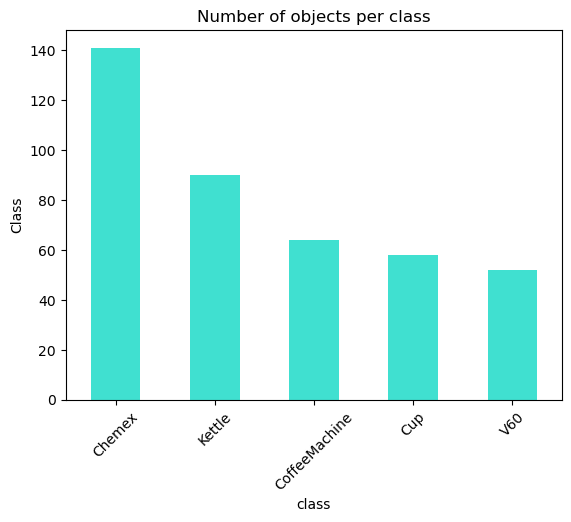

In [4]:
df["class"].value_counts().plot(kind="bar",  color='turquoise')
plt.title("Number of objects per class")
plt.ylabel("Count")
plt.ylabel("Class")
plt.xticks(rotation=45)
plt.show()

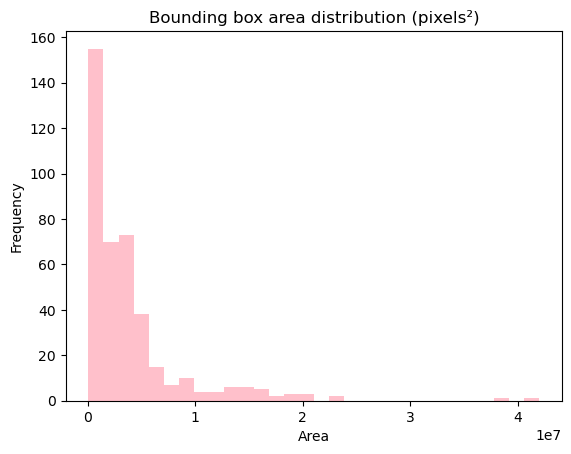

In [5]:
df["bbox_area"].plot(kind="hist", bins=30, color='pink')
plt.title("Bounding box area distribution (pixels²)")
plt.xlabel("Area")
plt.show()

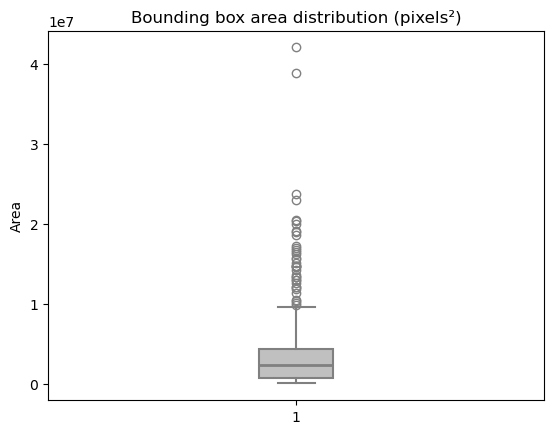

In [6]:
# Boxplot with full control
plt.boxplot(
    df["bbox_area"],
    patch_artist=True,  # allows facecolor
    boxprops=dict(facecolor="silver", edgecolor="grey", linewidth=1.5),
    whiskerprops=dict(color="grey", linewidth=1.5),
    capprops=dict(color="grey", linewidth=1.5),
    medianprops=dict(color="grey", linewidth=2),
    flierprops=dict(marker='o', markerfacecolor="none", markeredgecolor="grey", markersize=6, linestyle="none")
)

plt.title("Bounding box area distribution (pixels²)")
plt.ylabel("Area")
plt.gca().set_xlabel(None)
plt.show()

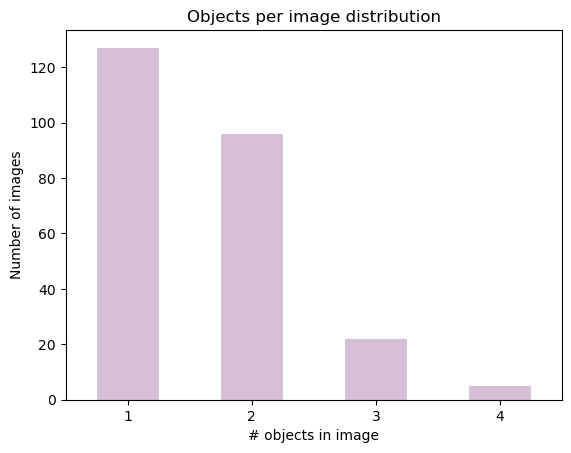

In [7]:
objects_per_image = df.groupby("image")["class"].count()

objects_per_image.value_counts().sort_index().plot(
    kind="bar", color="thistle"
)

plt.title("Objects per image distribution")
plt.xlabel("# objects in image")
plt.ylabel("Number of images")
plt.xticks(rotation=0)
plt.show()